# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
df_sinasc = sinasc_raw[['munResLat','IDADEMAE','IDADEPAI']]
#x=df_sinasc['munResLat'].unique()
#df_sinasc_new = df_sinasc.set_index('munResLat')
local = pd.cut(df_sinasc['munResLat'],[ -90,-10.5,90])
df_sinasc.pivot_table(values =['IDADEMAE','IDADEPAI'], index=local,
                      dropna=False, aggfunc={('Soma','sum'),('Media', 'mean'),('Min','min'),('max','max'), 
                                             ('Mediana','median'), ('Desv.','std'), ('Var.','var')
                                             })

IDADEMAE                                                \
                   Desv.      Media Mediana Min    Soma       Var. max   
munResLat                                                                
(-90.0, -10.5]  6.320385  26.178943    26.0  12  340143  39.947272  53   
(-10.5, 90.0]   6.447663  26.014964    25.0  11  365094  41.572355  52   

                IDADEPAI                                                      
                   Desv.      Media Mediana   Min      Soma       Var.   max  
munResLat                                                                     
(-90.0, -10.5]  7.707002  30.903145    30.0  15.0  198460.0  59.397875  86.0  
(-10.5, 90.0]   8.034214  32.126689    31.0  16.0   38038.0  64.548602  73.0

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [4]:
sinasc_raw['munResArea'].unique()
df_sinasc_1 = sinasc_raw[['munResArea','QTDFILVIVO','QTDFILMORT']]
mun = pd.cut(df_sinasc_1['munResArea'],[0,3000,99999])
df_sinasc_1.pivot_table(values=['QTDFILVIVO','QTDFILMORT'], index=mun, dropna=False,
                       aggfunc={('Soma','sum'),('Media', 'mean'),('Min','min'),('max','max'), 
                                             ('Mediana','median'), ('Desv.','std'), ('Var.','var')
                                             })


QTDFILMORT                                                 \
                   Desv.     Media Mediana  Min    Soma      Var.   max   
munResArea                                                                
(0, 3000]       0.551215  0.244803     0.0  0.0  1260.0  0.303838   4.0   
(3000, 99999]   0.629081  0.272116     0.0  0.0  5383.0  0.395743  28.0   

              QTDFILVIVO                                                  
                   Desv.     Media Mediana  Min     Soma      Var.   max  
munResArea                                                                
(0, 3000]       1.075442  0.924284     1.0  0.0   4773.0  1.156575  30.0  
(3000, 99999]   1.191750  1.086890     1.0  0.0  22053.0  1.420268  14.0

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
#sinasc_raw['munResAlt'].unique()
df_sinasc_2 = sinasc_raw[['munResAlt','IDADEMAE','QTDFILVIVO']]
res = pd.qcut(df_sinasc_2['munResAlt'],4)
df_sinasc_2.pivot_table(values =['IDADEMAE','QTDFILVIVO'], index = res, dropna=False,
                               aggfunc ={('Soma','sum'),('Media', 'mean'),('Min','min'),('max','max'), 
                                             ('Mediana','median'), ('Desv.','std'), ('Var.','var')
                                             } )


IDADEMAE                                                \
                   Desv.      Media Mediana Min    Soma       Var. max   
munResAlt                                                                
(84.999, 87.0]  6.543106  26.271598    26.0  12  230507  42.812240  47   
(87.0, 153.0]   6.389296  25.426155    25.0  11  123266  40.823100  46   
(153.0, 191.0]  6.240142  26.133468    26.0  12  181314  38.939370  52   
(191.0, 595.0]  6.294953  26.310499    26.0  13  170150  39.626433  53   

               QTDFILVIVO                                                 
                    Desv.     Media Mediana  Min    Soma      Var.   max  
munResAlt                                                                 
(84.999, 87.0]   1.236798  1.177798     1.0  0.0  8976.0  1.529670  12.0  
(87.0, 153.0]    1.319208  1.189225     1.0  0.0  5430.0  1.740309  14.0  
(153.0, 191.0]   1.041525  0.922608     1.0  0.0  6354.0  1.084773   9.0  
(191.0, 595.0]   1.079861  0.950784     1.0  0.0  6066.0  1.166099  30.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

<AxesSubplot:xlabel='munResNome'>

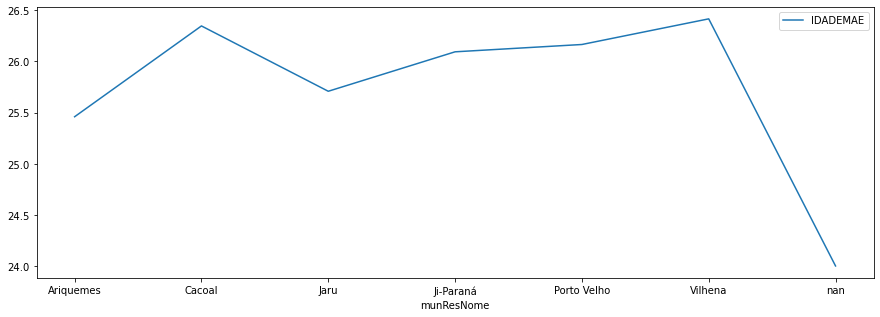

In [6]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

df_sinasc_3 = sinasc_raw[['munResNome','IDADEMAE']]
df_sinasc_3 = df_sinasc_3.set_index('munResNome')
df_sinasc_3.groupby(imediatas, dropna=False ).mean().plot(figsize=[15,5])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [7]:
idh = {
    "Candeias do Jamari": "Médio",
    "Guajará-Mirim": "Médio",
    "Itapuã do Oeste": "Médio",
    "Nova Mamoré": "Baixo",
    "Porto Velho": "Alto",
    "Ariquemes": "Alto",
    "Alto Paraíso": "Médio",
    "Ariquemes": "Médio",
    "Buritis": "Médio",
    "Cacaulândia": "Médio",
    "Campo Novo de Rondônia": "Baixo",
    "Cujubim": "Médio",
    "Monte Negro": "Médio",
    "Rio Crespo": "Médio",
    "Jaru": "Médio",
    "Governador Jorge Teixeira": "Baixo",
    "Machadinho D'Oeste": "Baixo",
    "Theobroma": "Baixo",
    "Vale do Anari": "Baixo",
    "Alvorada D'Oeste": "Médio",
    "Costa Marques": "Médio",
    "Ji-Paraná": "Alto",
    "Mirante da Serra": "Médio",
    "Nova União": "Baixo",
    "Ouro Preto do Oeste": "Médio",
    "Presidente Médici": "Médio",
    "São Francisco do Guaporé": "Médio",
    "São Miguel do Guaporé": "Médio",
    "Seringueiras": "Baixo",
    "Teixeirópolis": "Médio",
    "Urupá": "Médio",
    "Vale do Paraíso": "Médio",
    "Cacoal": "Alto",
    "Alta Floresta D'Oeste": "Médio",
    "Alto Alegre dos Parecis": "Baixo",
    "Castanheiras": "Médio",
    "Espigão D'Oeste": "Médio",
    "Ministro Andreazza": "Médio",
    "Nova Brasilândia D'Oeste": "Médio",
    "Novo Horizonte do Oeste": "Médio",
    "Parecis": "Médio",
    "Pimenta Bueno": "Alto",
    "Primavera de Rondônia": "Médio",
    "Rolim de Moura": "Alto",
    "Santa Luzia D'Oeste": "Médio",
    "São Felipe D'Oeste": "Médio",
    "Vilhena": "Alto",
    "Cabixi": "Médio",
    "Cerejeiras": "Médio",
    "Chupinguaia": "Médio",
    "Colorado do Oeste": "Médio",
    "Corumbiara": "Médio",
    "Pimenteiras do Oeste": "Médio"
}

df_sinasc_4 = sinasc_raw[['munResNome','ESCMAE','IDADEMAE','QTDFILVIVO','QTDFILMORT']]

df_sinasc_4 = df_sinasc_4.set_index('munResNome')
#df_sinasc_4
df_sinasc_4.groupby([idh,'ESCMAE'],dropna=False).agg([('Média', 'mean'), ('Min', 'min'),('Max', 'max')])
#.agg([('Média', 'mean'), ('Min', 'min'),('Max', 'max')])

IDADEMAE         QTDFILVIVO             \
                                Média Min Max      Média  Min   Max   
munResNome ESCMAE                                                     
Alto       1 a 3 anos       28.337719  12  45   2.533019  0.0  12.0   
           12 anos ou mais  29.768004  16  47   0.704360  0.0   7.0   
           4 a 7 anos       24.232269  12  46   1.564321  0.0   9.0   
           8 a 11 anos      25.339069  12  47   0.988962  0.0  10.0   
           Nenhuma          32.052632  18  42   4.473684  0.0  12.0   
           NaN              28.027273  15  43   1.275132  0.0   9.0   
Baixo      1 a 3 anos       28.918367  16  44   2.510638  0.0  10.0   
           12 anos ou mais  28.756757  19  43   0.854460  0.0   3.0   
           4 a 7 anos       24.691211  13  44   1.438903  0.0   8.0   
           8 a 11 anos      24.707734  13  46   0.905983  0.0   7.0   
           Nenhuma          30.333333  23  41   1.333333  0.0   4.0   
           NaN              25.526316  16  39   1.470588  0.0   5.0   
Médio      1 a 3 anos       28.418410  12  44   2.254237  0.0   8.0   
           12 anos ou mais  29.182379  17  51   0.745665  0.0   4.0   
           4 a 7 anos       25.050830  11  47   1.566329  0.0  30.0   
           8 a 11 anos      24.966860  13  53   0.941359  0.0  14.0   
           Nenhuma          31.277778  14  52   3.222222  0.0  12.0   
           NaN              27.123288  14  39   1.422535  0.0   7.0   
NaN        8 a 11 anos      24.000000  24  24   1.000000  1.0   1.0   

                           QTDFILMORT             
                                Média  Min   Max  
munResNome ESCMAE                                 
Alto       1 a 3 anos        0.487685  0.0   3.0  
           12 anos ou mais   0.274151  0.0  28.0  
           4 a 7 anos        0.304731  0.0   8.0  
           8 a 11 anos       0.262772  0.0   6.0  
           Nenhuma           0.687500  0.0   9.0  
           NaN               0.255556  0.0   3.0  
Baixo      1 a 3 anos        0.377778  0.0   2.0  
           12 anos ou mais   0.184834  0.0   6.0  
           4 a 7 anos        0.326371  0.0   4.0  
           8 a 11 anos       0.220488  0.0   9.0  
           Nenhuma           1.666667  1.0   2.0  
           NaN               0.470588  0.0   4.0  
Médio      1 a 3 anos        0.415584  0.0   4.0  
           12 anos ou mais   0.229374  0.0   6.0  
           4 a 7 anos        0.331697  0.0   6.0  
           8 a 11 anos       0.232775  0.0   7.0  
           Nenhuma           0.294118  0.0   2.0  
           NaN               0.260870  0.0   2.0  
NaN        8 a 11 anos       1.000000  1.0   1.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [8]:
ifdm = {
"Ariquemes":"Moderado", 
"Vilhena":"Moderado",
"Pimenta Bueno":"Moderado", 
"Porto Velho":"Moderado", 
"Ji-Paraná":"Moderado", 
"Cacoal":"Moderado", 
"Santa Luzia d'Oeste":"Moderado", 
"Rolim de Moura":"Moderado", 
"Chupinguaia":"Moderado", 
"São Miguel do Guaporé":"Moderado", 
"Pimenteiras do Oeste":"Moderado", 
"Teixeirópolis":"Moderado", 
"Colorado do Oeste":"Moderado", 
"Jaru":"Moderado", 
"Rio Crespo":"Moderado", 
"Primavera de Rondônia":"Moderado", 
"Alta Floresta d'Oeste":"Moderado", 
"Ouro Preto do Oeste":"Moderado", 
"São Francisco do Guaporé":"Moderado", 
"Candeias do Jamari":"Moderado", 
"Buritis":"Moderado", 
"São Felipe d'Oeste":"Moderado", 
"Presidente Médici":"Moderado", 
"Cerejeiras":"Moderado", 
"Monte Negro":"Moderado", 
"Urupá":"Moderado", 
"Espigão d'Oeste":"Regular",
"Seringueiras":"Regular",
"Alvorada d'Oeste":"Regular",
"Itapuã do Oeste":"Regular",
"Cabixi":"Regular",
"Novo Horizonte do Oeste":"Regular",
"Nova Brasilândia d'Oeste":"Regular",
"Vale do Paraíso":"Regular",
"Corumbiara":"Regular",
"Alto Paraíso":"Regular",
"Cacaulândia":"Regular",
"Vale do Anari":"Regular",
"Ministro Andreazza":"Regular",
"Costa Marques":"Regular",
"Nova União":"Regular",
"Guajará-Mirim":"Regular",
"Mirante da Serra":"Regular",
"Parecis":"Regular",
"Castanheiras":"Regular",
"Theobroma":"Regular",
"Machadinho d'Oeste":"Regular",
"Campo Novo de Rondônia":"Regular",
"Nova Mamoré":"Regular",
"Cujubim":"Regular",
"Alto Alegre dos Parecis":"Regular",
"Governador Jorge Teixeira":"Regular",
}
df_sinasc_5 = sinasc_raw[['munResNome','ESCMAE','IDADEMAE','QTDFILVIVO','QTDFILMORT']]

df_sinasc_5 = df_sinasc_5.set_index('munResNome')

df_sinasc_5.groupby([ifdm,'ESCMAE'],dropna=False).agg([('Média', 'mean'), ('Min', 'min'),('Max', 'max')])



IDADEMAE         QTDFILVIVO             \
                                Média Min Max      Média  Min   Max   
munResNome ESCMAE                                                     
Moderado   1 a 3 anos       28.300000  12  45   2.401662  0.0  12.0   
           12 anos ou mais  29.674980  16  47   0.720885  0.0   7.0   
           4 a 7 anos       24.439415  12  47   1.515133  0.0  10.0   
           8 a 11 anos      25.234803  12  53   0.958618  0.0  10.0   
           Nenhuma          30.344828  14  42   3.724138  0.0  12.0   
           NaN              27.864151  14  43   1.271552  0.0   9.0   
Regular    1 a 3 anos       28.951220  16  44   2.493827  0.0   7.0   
           12 anos ou mais  28.716186  17  43   0.759725  0.0   4.0   
           4 a 7 anos       25.036802  11  42   1.695538  0.0  10.0   
           8 a 11 anos      24.717504  13  46   1.014350  0.0  14.0   
           Nenhuma          35.000000  20  52   2.500000  0.0   6.0   
           NaN              26.892857  16  39   1.807692  0.0   7.0   
NaN        1 a 3 anos       28.555556  14  43   2.226415  0.0  10.0   
           12 anos ou mais  28.805233  18  51   0.713433  0.0   3.0   
           4 a 7 anos       25.197590  13  44   1.607317  0.0  30.0   
           8 a 11 anos      25.120690  13  53   0.921173  0.0   6.0   
           Nenhuma          34.333333  28  40   6.333333  2.0  12.0   
           NaN              26.000000  17  38   1.315789  0.0   5.0   

                           QTDFILMORT             
                                Média  Min   Max  
munResNome ESCMAE                                 
Moderado   1 a 3 anos        0.492795  0.0   4.0  
           12 anos ou mais   0.266270  0.0  28.0  
           4 a 7 anos        0.315447  0.0   8.0  
           8 a 11 anos       0.255427  0.0   6.0  
           Nenhuma           0.560000  0.0   9.0  
           NaN               0.257919  0.0   3.0  
Regular    1 a 3 anos        0.316456  0.0   2.0  
           12 anos ou mais   0.231121  0.0   6.0  
           4 a 7 anos        0.347594  0.0   6.0  
           8 a 11 anos       0.237118  0.0   7.0  
           Nenhuma           0.875000  0.0   2.0  
           NaN               0.461538  0.0   4.0  
NaN        1 a 3 anos        0.301887  0.0   2.0  
           12 anos ou mais   0.152239  0.0   2.0  
           4 a 7 anos        0.282500  0.0   4.0  
           8 a 11 anos       0.194291  0.0   9.0  
           Nenhuma           0.000000  0.0   0.0  
           NaN               0.157895  0.0   1.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [11]:
pib = {
"Ariquemes":"Acima de 1 Bilhão", 
"Vilhena":"Acima de 1 Bilhão",
"Pimenta Bueno":"Acima de 1 Bilhão", 
"Porto Velho":"Acima de 1 Bilhão", 
"Ji-Paraná":"Acima de 1 Bilhão", 
"Cacoal":"Acima de 1 Bilhão", 
"Santa Luzia d'Oeste":"Acima de 100 Milhões", 
"Rolim de Moura":"Acima de 1 Bilhão", 
"Chupinguaia":"Acima de 100 Milhões", 
"São Miguel do Guaporé":"Acima de 500 Milhões", 
"Pimenteiras do Oeste":"Até 100 Milhões", 
"Teixeirópolis":"Até 100 Milhões", 
"Colorado do Oeste":"Acima de 300 Milhões", 
"Jaru":"Acima de 1 Bilhão", 
"Rio Crespo":"Até 100 Milhões", 
"Primavera de Rondônia":"Até 100 Milhões", 
"Alta Floresta d'Oeste":"Acima de 300 Milhões", 
"Ouro Preto do Oeste": "Acima de 500 Milhões", 
"São Francisco do Guaporé":"Acima de 300 Milhões", 
"Candeias do Jamari":"Acima de 500 Milhões", 
"Buritis":"Acima de 500 Milhões", 
"São Felipe d'Oeste":"Até 100 Milhões", 
"Presidente Médici":"Acima de 300 Milhões", 
"Cerejeiras":"Acima de 500 Milhões", 
"Monte Negro":"Acima de 200 Milhões", 
"Urupá":"Acima de 100 Milhões", 
"Espigão d'Oeste":"Acima de 500 Milhões",
"Seringueiras":"Acima de 100 Milhões",
"Alvorada d'Oeste":"Acima de 200 Milhões",
"Itapuã do Oeste":"Acima de 100 Milhões",
"Cabixi":"Acima de 100 Milhões",
"Novo Horizonte do Oeste":"Acima de 100 Milhões",
"Nova Brasilândia d'Oeste":"Acima de 300 Milhões",
"Vale do Paraíso":"Acima de 100 Milhões",
"Corumbiara":"Acima de 100 Milhões",
"Alto Paraíso":"Acima de 300 Milhões",
"Cacaulândia":"Acima de 100 Milhões",
"Vale do Anari":"Acima de 100 Milhões",
"Ministro Andreazza":"Acima de 100 Milhões",
"Costa Marques":"Acima de 100 Milhões",
"Nova União":"Até 100 Milhões",
"Guajará-Mirim":"Acima de 500 Milhões",
"Mirante da Serra":"Acima de 100 Milhões",
"Parecis":"Até 100 Milhões",
"Castanheiras":"Até 100 Milhões",
"Theobroma":"Acima de 100 Milhões",
"Machadinho d'Oeste":"Acima de 500 Milhões",
"Campo Novo de Rondônia":"Acima de 200 Milhões",
"Nova Mamoré":"Acima de 500 Milhões",
"Cujubim":"Acima de 300 Milhões",
"Alto Alegre dos Parecis":"Acima de 200 Milhões",
"Governador Jorge Teixeira":"Acima de 100 Milhões"
}

df_sinasc_6 = sinasc_raw[['munResNome','ESCMAE','IDADEMAE','QTDFILVIVO','QTDFILMORT']]

df_sinasc_6 = df_sinasc_6.set_index('munResNome')

df_sinasc_6.groupby([pib,'ESCMAE'],dropna=False).agg([('Média', 'mean'), ('Min', 'min'),('Max', 'max')])


IDADEMAE         QTDFILVIVO             \
                                          Média Min Max      Média  Min   Max   
munResNome           ESCMAE                                                     
Acima de 1 Bilhão    1 a 3 anos       28.065147  12  45   2.405498  0.0  12.0   
                     12 anos ou mais  29.731576  16  47   0.713096  0.0   7.0   
                     4 a 7 anos       24.154031  12  46   1.504574  0.0   9.0   
                     8 a 11 anos      25.285471  12  47   0.964103  0.0  10.0   
                     Nenhuma          30.880000  14  42   3.880000  0.0  12.0   
                     NaN              28.017544  15  43   1.258883  0.0   9.0   
Acima de 100 Milhões 1 a 3 anos       29.756098  16  44   2.600000  0.0   8.0   
                     12 anos ou mais  28.652672  17  43   0.697674  0.0   4.0   
                     4 a 7 anos       25.669399  12  42   1.472222  0.0   9.0   
                     8 a 11 anos      24.737113  13  46   0.834061  0.0  14.0   
                     Nenhuma          40.333333  28  52   1.666667  0.0   5.0   
                     NaN              27.705882  16  39   2.058824  0.0   6.0   
Acima de 200 Milhões 1 a 3 anos       27.375000  19  37   1.812500  0.0   5.0   
                     12 anos ou mais  27.945205  19  41   0.897059  0.0   3.0   
                     4 a 7 anos       24.572519  13  40   1.258333  0.0   7.0   
                     8 a 11 anos      24.471631  14  41   0.886275  0.0   6.0   
                     Nenhuma          35.000000  35  35   2.000000  2.0   2.0   
                     NaN              26.125000  17  37   0.733333  0.0   2.0   
Acima de 300 Milhões 1 a 3 anos       29.942857  16  43   2.323529  0.0   8.0   
                     12 anos ou mais  29.023923  17  42   0.825243  0.0   4.0   
                     4 a 7 anos       25.021097  11  47   1.469828  0.0   7.0   
                     8 a 11 anos      24.771654  14  44   0.931489  0.0   6.0   
                     NaN              29.333333  17  38   2.222222  0.0   7.0   
Acima de 500 Milhões 1 a 3 anos       28.535714  16  42   2.648148  0.0   7.0   
                     12 anos ou mais  29.353160  17  44   0.770000  0.0   4.0   
                     4 a 7 anos       25.466346  13  42   1.910806  0.0  10.0   
                     8 a 11 anos      24.888520  14  53   1.090384  0.0  11.0   
                     Nenhuma          28.142857  20  42   3.142857  0.0   6.0   
                     NaN              25.857143  14  38   1.444444  0.0   4.0   
Até 100 Milhões      1 a 3 anos       29.714286  20  39   2.000000  1.0   6.0   
                     12 anos ou mais  30.207547  22  41   0.641509  0.0   2.0   
                     4 a 7 anos       25.222222  16  40   1.408451  0.0   6.0   
                     8 a 11 anos      25.971074  14  40   0.974790  0.0   5.0   
                     Nenhuma          35.000000  35  35   2.000000  2.0   2.0   
                     NaN              26.500000  22  31   1.000000  0.0   2.0   
NaN                  1 a 3 anos       28.555556  14  43   2.226415  0.0  10.0   
                     12 anos ou mais  28.805233  18  51   0.713433  0.0   3.0   
                     4 a 7 anos       25.197590  13  44   1.607317  0.0  30.0   
                     8 a 11 anos      25.120690  13  53   0.921173  0.0   6.0   
                     Nenhuma          34.333333  28  40   6.333333  2.0  12.0   
                     NaN              26.000000  17  38   1.315789  0.0   5.0   

                                     QTDFILMORT             
                                          Média  Min   Max  
munResNome           ESCMAE                                 
Acima de 1 Bilhão    1 a 3 anos        0.485816  0.0   4.0  
                     12 anos ou mais   0.265097  0.0  28.0  
                     4 a 7 anos        0.303726  0.0   8.0  
                     8 a 11 anos       0.255842  0.0   6.0  
                     Nenhuma           0.545455

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Conclusão: 
Independentemente da Região, IDH, IFDM ou PIB, quanto menor a escolaridade da mãe, maior a quantidade média de filhos.